In [14]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy

# Integration (or derivation/differentiation) of discretly sampled wave signals

Demonstrate that integration in the frequency domain of band-limited signals is an equivalent alternative to other quadrature schemes.

<IPython.core.display.Javascript object>


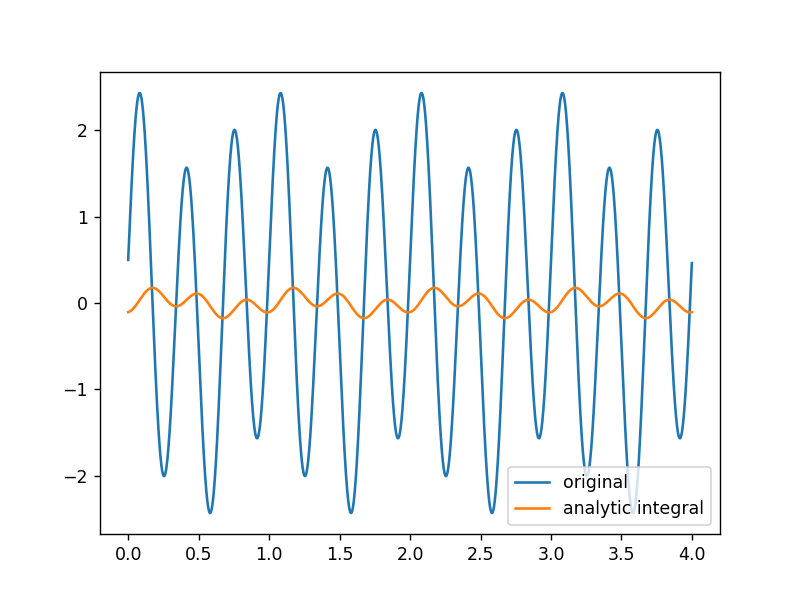

4000


In [29]:
# Create some harmonic signals
dt = 0.001
fs = 1/dt
t = np.arange(0, 4, dt)
s = 2*np.sin(3*2*np.pi*t) + 0.5*np.cos(2*np.pi*t)

# The analytical integral
sa = 2/(3*2*np.pi) * -np.cos(3*2*np.pi*t) + 0.5/(2*np.pi) * np.sin(2*np.pi*t)

plt.figure()
plt.plot(t, s, label='original')
plt.plot(t, sa, label='analytic integral')
plt.legend()

#print(2/(3*2*np.pi))
#print(0.5/(2*np.pi))
#print(2*np.pi)
print(len(t))

<IPython.core.display.Javascript object>


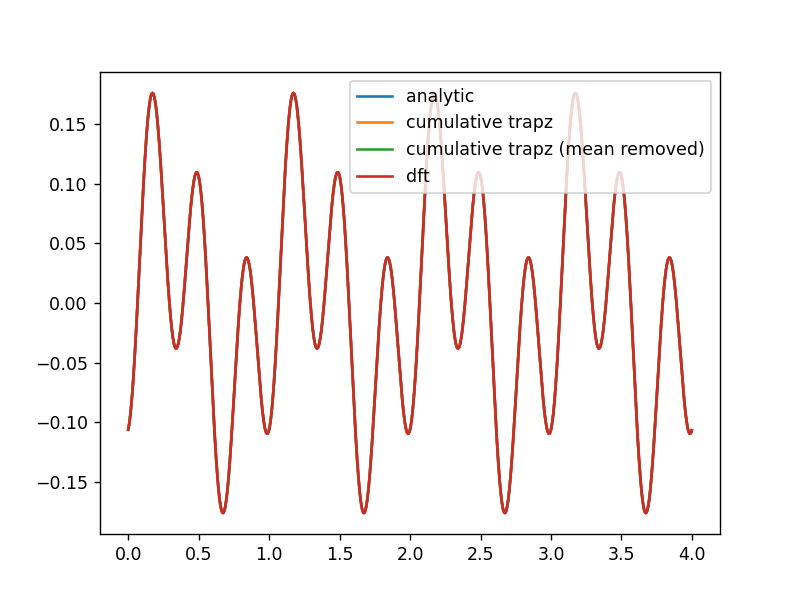

In [39]:
# Now let's try to integrate this signal using the cumulative trapezoid rule

sc = scipy.integrate.cumulative_trapezoid(s, dx=dt)
sc = sc - np.mean(sc) # need to remove mean.. for some reason (probably because there's a mean in the original signal)

scm = scipy.integrate.cumulative_trapezoid(s-np.mean(s), dx=dt)

# Create frequency integrator
def dft_integrate(x, fs):
    """
    Integrate in the Fourier domain. See Brandt & Brincker (2014) for a comparsion with the trapezoidal rule.
    """

    L = len(x)
    N = 2 * L  # x should be padded to avoid cyclic aliasing, achieved through taking the DFT at 2*L.

    X = np.fft.rfft(x, N)

    ## Integrator operator
    f = np.fft.rfftfreq(N, d=1. / fs)
    w = 2. * np.pi * f
    H = np.empty(shape=w.shape, dtype=complex)
    H[1:] = 1. / (1j * w[1:])
    H[0] = 0.

    ## Integrate
    Y = X * H

    y = np.fft.irfft(Y)
    y = y[:L]

    return y

sd = dft_integrate(s, fs)
sd = sd - np.mean(sd) # also need to remove mean because of DC component in input signal.

plt.figure()
plt.plot(t, sa, label='analytic')
plt.plot(t[:-1], sc, label='cumulative trapz')
plt.plot(t[:-1], sc, label='cumulative trapz (mean removed)')
plt.plot(t, sd, label='dft')
plt.legend()

<IPython.core.display.Javascript object>


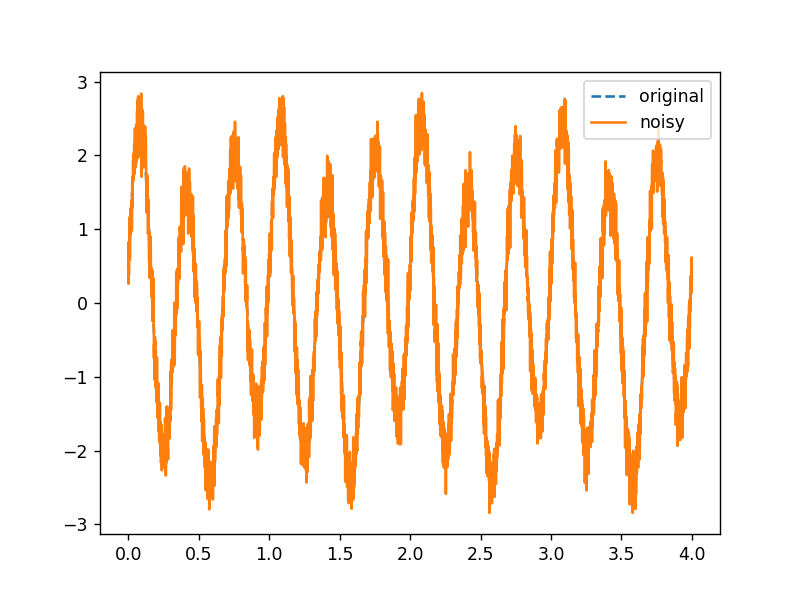

In [37]:
# Integrating noisy data: add noise to signal.
noise = np.random.normal(0, 0.2, len(t))
sn = s + noise

plt.figure()
plt.plot(t, s, '--', label='original')
plt.plot(t, sn, label='noisy')
plt.legend()

<IPython.core.display.Javascript object>


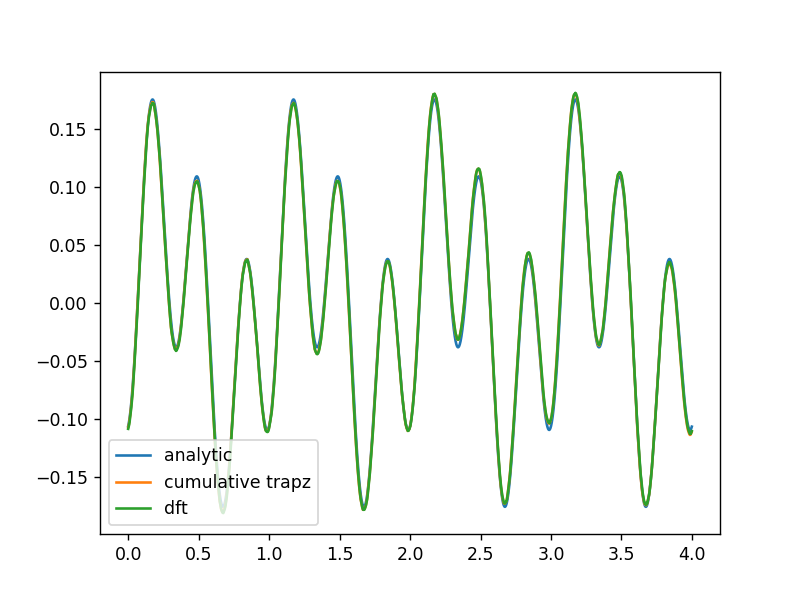

In [40]:
# Integrate noisy signal
scn = scipy.integrate.cumulative_trapezoid(sn, dx=dt)
scn = scn - np.mean(scn)
sdn = dft_integrate(sn, fs)
sdn = sdn - np.mean(sdn)

plt.figure()
plt.plot(t, sa, label='analytic')
plt.plot(t[:-1], scn, label='cumulative trapz')
plt.plot(t, sdn, label='dft')
plt.legend()